[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/dlukes/dlukes.github.io/source?filepath=content%2Fnotebooks%2Fjupyter_magic.ipynb)

Python-based [Jupyter](http://jupyter.org/) notebooks mostly consist of Python code, obviously, and some Markdown text. But they also offer some very handy functions and shortcuts which are not available in Python itself, and which are really helpful for interactive work. This is my personal best of / reference.

The shortcuts fall into two groups:

- **magics**: special functions with special syntax whose names start with `%` (in which case they apply to the rest of the line → "line magics") or `%%` (in which case they apply to the entire cell → "cell magics")
- **command line programs**: if you know how to use command line programs, you can do so directly from the notebook by prefixing the command line invocation with `!`

If you want to follow along, the easiest way is to just [click this link](https://mybinder.org/v2/gh/dlukes/dlukes.github.io/source?filepath=content%2Fnotebooks%2Fjupyter_magic.ipynb) and have Binder launch a Jupyter environment with the notebook loaded for you. Or you can download this post in its original notebook format [here](https://raw.githubusercontent.com/dlukes/dlukes.github.io/source/content/notebooks/jupyter_magic.ipynb) and load it into your own Jupyter instance yourself.

**NB:** Most of the following also applies to the [IPython REPL](https://ipython.org/). 

## Magics

The syntax of magic functions is modeled after the syntax of command line programs:

- to call them, just write their name and evaluate the cell, without any parentheses (unlike regular Python functions, which are called like this: `function()`)
- arguments are separated just by whitespace (in Python, there are commas: `function(arg1, arg)`)
- some have optional arguments (**options**) which tweak their behavior: these are formed by a hyphen and a letter, e.g. `-r`

### Getting help

You can read more about the magic function system by calling the `%magic` magic:

In [1]:
%magic

`%quickref` brings up a useful cheat sheet of special functionality:

In [2]:
%quickref

If you want more information about an object, `%pinfo` and `%pinfo2` are your friends:

In [3]:
def foo():
    "This foo function returns bar."
    return "bar"

In [4]:
# shows the object's docstring
%pinfo foo

In [5]:
# shows the full source code
%pinfo2 foo

These are so handy that they have their own special syntax: `?` and `??`, placed either before or after the object's name:

In [6]:
?foo

In [7]:
foo?

In [8]:
??foo

In [9]:
foo??

Of course, this also works with magic functions:

In [10]:
?%pylab

You can also open a documentation popup by pressing `Shift+Tab` with your cursor placed in or after a variable name. Repeating the command cycles through different levels of detail.

### Manipulating objects

The appeal of an interactive environment like Jupyter is that you can inspect any object you're working with by just evaluating it:

In [11]:
foo = 1

In [12]:
foo

1

`%who` and `%whos` will show you all the objects you've defined:

In [13]:
%who

foo	 


In [14]:
%whos

Variable   Type    Data/Info
----------------------------
foo        int     1


Sometimes though, these objects are large and you don't want to litter your notebook with tons of output you'll delete right afterwards. (Also, if you forget to delete it, your notebook might get [too large to save](https://github.com/jupyter/notebook/issues/650).) That's when you need to use the Jupyter pager, which lets you inspect an object in a separate window.

In [15]:
foo = "This is a line of text.\n" * 1000

In [16]:
%page foo

By default, the pager pretty-prints objects using the `pprint()` function from the `pprint` module. This is handy for collections, because it nicely shows the nesting hierarchy, but not so much for strings, because special characters like newlines `\n` are shown as escape sequences. If you want the string to look like it would if it were a text file, pass the `-r` option ("raw") to page through the result of calling `str()` on the object instead:

In [17]:
%page -r foo

If you want to inspect the source code of a module, use `%pfile` on the object representing that module, or an object imported from that module:

In [18]:
import os
from random import choice

In [19]:
%pfile os

In [20]:
%pfile choice

Sometimes, you create an object which you know you will want to reuse in a different session or maybe in a completely different notebook. A lightweight way to achieve this is using the `%store` magic:

In [21]:
%store foo

Stored 'foo' (str)


You can list the values stored in your database by invoking `%store` without arguments:

In [22]:
%store

Stored variables and their in-db values:
foo             -> 'This is a line of text.\nThis is a line of text.\


To restore a variable from the database into your current Python process, use the `-r` option:

In [23]:
# restores only `foo`
%store -r foo

In [24]:
# restores all variables in the database
%store -r

And this is how you clear no longer needed variables from storage:

In [25]:
# removes `foo`
%store -d foo

In [26]:
# removes all variables
%store -z

In [27]:
%store

Stored variables and their in-db values:


### Working with the file system

`%ls` lists files in the directory where your notebook is stored:

In [28]:
%ls

3foos.py              command_line_intro.ipynb  pos_tagging.ipynb    zipf.ipynb
classification.ipynb  foo.py                    regex.ipynb
cmudict.ipynb         jupyter_magic.ipynb       unicode.ipynb
collocations.ipynb    libraries.ipynb           xcorr_vs_conv.ipynb


If you provide a path as argument, it lists that directory instead:

In [29]:
%ls /etc/nginx

conf.d/         koi-utf     nginx.conf    sites-available/  uwsgi_params
fastcgi.conf    koi-win     proxy_params  sites-enabled/    win-utf
fastcgi_params  mime.types  scgi_params   snippets/


If you provide a [glob pattern](https://en.wikipedia.org/wiki/Glob_%28programming%29), then only files that match it are listed:

In [30]:
%ls /etc/nginx/*.conf

/etc/nginx/fastcgi.conf  /etc/nginx/nginx.conf


`%ll` ("long listing") formats the listing as one entry per line with columns providing additional information:

In [31]:
%ll ~/edu/

total 12805
drwxrwsrwt+  3 lukes 2000147 Oct  4 18:52 exchange/
drwxrwsr-x+ 21 lukes 2041640 Oct 24 14:44 lukes/
drwxrwsr-x+  9 lukes 2060567 Dec 18 21:54 mda/
drwxrwsr-x+ 14 lukes 3001102 Oct 31 17:39 python/
drwxrwsr-x+  4 lukes 2004559 Feb 23  2017 r/
drwxr-sr-x+  4 lukes 2002420 Mar  9  2017 textlink/


One of those columns indicates file size, which is great, but they're in bytes, which is less great (hard to read at a glance). The `-h` option makes the file sizes print in human-readable format:

In [32]:
%ll -h ~/edu/python/syn*

-rw-rw-r--+ 1 lukes 1.5G Nov  1  2016 /home/lukes/edu/python/syn2015.gz
-rw-rw-r--+ 1 lukes 112M Nov  2  2016 /home/lukes/edu/python/syn2015_sample


`%%writefile` writes the contents of a cell to a file:

In [33]:
%%writefile foo.py

def foo():
    "This foo function returns bar."
    return "bar"

Writing foo.py


`%cat` prints the contents of a file into the notebook:

In [34]:
%cat foo.py


def foo():
    "This foo function returns bar."
    return "bar"

`%cat` is called `%cat` because it can also con**cat**enate multiple files (or the same file, multiple times):

In [35]:
%cat foo.py foo.py


def foo():
    "This foo function returns bar."
    return "bar"
def foo():
    "This foo function returns bar."
    return "bar"

The output of `%cat` can be saved into a file with `>` (if the file exists, it's overwritten):

In [36]:
%cat foo.py foo.py >3foos.py

In [37]:
%cat 3foos.py


def foo():
    "This foo function returns bar."
    return "bar"
def foo():
    "This foo function returns bar."
    return "bar"

Hey! Our `3foos.py` is one foo short. Let's add it by **appending** to the file with `>>`:

In [38]:
%cat foo.py >>3foos.py

In [39]:
%cat 3foos.py


def foo():
    "This foo function returns bar."
    return "bar"
def foo():
    "This foo function returns bar."
    return "bar"
def foo():
    "This foo function returns bar."
    return "bar"

There, much better.

`%less` opens a file in the pager (with nice syntax highlighting if it's a Python source file):

In [40]:
%less foo.py

`%less` is named after the program `less`, which is used to page through text files at the command line. Why is the original `less` called "less"? Because an earlier pager program was called `more` (as in "show me *more* of this text file"), and as the saying goes, "less is more".

(Programmers are fond of dad jokes. I like how this one works on multiple levels -- the literal meaning that `less`-the-program is intended to replace `more`-the-program interacts with the figurative meaning that having less is better than having more, and both coalesce into "use `less` because it's better than `more`".)

`%cat` and `%ls` are also named after corresponding command line programs.

### Finding out more about your code

When developing, code often behaves differently from what you intended when you wrote it. The following tools might help you find out why.

Timing the execution of a piece of code will help you determine if it's slowing you down. The `%timeit` magic has your back, it runs your code repeatedly and thus provides more reliable estimates. It comes in both line and cell variants.

In [41]:
%timeit sorted(range(1_000_000))

61.4 ms ± 7.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%%timeit
lst = list(range(1_000_000))
sorted(lst)

68.8 ms ± 7.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The cell variant can include initialization code on the first line, which is run only once:

In [43]:
%%timeit lst = list(range(1_000_000))
sorted(lst)

28.8 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


If you have the [memory_profiler](https://github.com/pythonprofilers/memory_profiler) library installed, you can load its magic extension and use `%memit` in the same way as `%timeit` to get a notion of how much memory your code is consuming.

In [44]:
%load_ext memory_profiler

In [45]:
%memit list(range(1_000_000))

peak memory: 82.43 MiB, increment: 35.71 MiB


*Peak memory* is the highest total amount of memory the Python process used when your code ran. *Increment* is peak memory minus the amount of memory Python used *before* your code ran.

In [46]:
%%memit
lst = list(range(1_000_000))
even = [i for i in lst if i % 2 == 0]

peak memory: 127.82 MiB, increment: 73.29 MiB


In [47]:
%%memit lst = list(range(1_000_000))
even = [i for i in lst if i % 2 == 0]

peak memory: 98.02 MiB, increment: -30.69 MiB


If you have a more involved piece of code where multiple functions are called, you may need more granular information about running times than that provided by `%timeit`. In that case, you can resort to **profiling** using the `%prun` magic. Profiling tells you how fast different parts of your code run relative to each other, in other words, where your bottlenecks are.

In [48]:
import time

def really_slow():
    time.sleep(1)

def fast():
    pass

def only_slow_because_it_calls_another_slow_function():
    fast()
    really_slow()

In [49]:
%prun only_slow_because_it_calls_another_slow_function()

The results show up in the pager, here's a copy:

```
         7 function calls in 1.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.001    1.001    1.001    1.001 {built-in method time.sleep}
        1    0.000    0.000    1.001    1.001 {built-in method builtins.exec}
        1    0.000    0.000    1.001    1.001 <ipython-input-81-8d3b1f67a0d9>:3(really_slow)
        1    0.000    0.000    1.001    1.001 <ipython-input-81-8d3b1f67a0d9>:9(only_slow_because_it_calls_another_slow_function)
        1    0.000    0.000    1.001    1.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <ipython-input-81-8d3b1f67a0d9>:6(fast)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

`%prun` also has a cell variant:

In [50]:
%%prun
really_slow()
fast()

```
         6 function calls in 1.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.001    1.001    1.001    1.001 {built-in method time.sleep}
        1    0.000    0.000    1.001    1.001 {built-in method builtins.exec}
        1    0.000    0.000    1.001    1.001 <string>:2(<module>)
        1    0.000    0.000    1.001    1.001 <ipython-input-81-8d3b1f67a0d9>:3(really_slow)
        1    0.000    0.000    0.000    0.000 <ipython-input-81-8d3b1f67a0d9>:6(fast)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

Perhaps the most useful magic for development is `%debug`, which allows you to pause the execution of a piece of code, examine the variables which are defined at that moment in time, resume execution fully or step-by-step etc. You can either pass a statement that you want to debug as argument:

In [51]:
def foo():
    for i in range(10):
        print("printing", i)

In [52]:
%debug foo()

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> help

Documented commands (type help <topic>):
EOF    cl         disable  interact  next    psource  rv         unt   
a      clear      display  j         p       q        s          until 
alias  commands   down     jump      pdef    quit     source     up    
args   condition  enable   l         pdoc    r        step       w     
b      cont       exit     list      pfile   restart  tbreak     whatis
break  continue   h        ll        pinfo   return   u          where 
bt     d          help     longlist  pinfo2  retval   unalias  
c      debug      ignore   n         pp      run      undisplay

Miscellaneous help topics:
exec  pdb

ipdb> step
--Call--
> <ipython-input-51-e20c0aea6cfb>(1)foo()
----> 1 def foo():
      2     for i in range(10):
      3         print("printing", i)

ipdb> next
> <ipython-input-51-e20c0aea6cfb>(2)foo()
      1 def foo():
----> 2     for i in range(10):
      3 

Or you can invoke plain `%debug` after an exception has been raised to jump directly to the place where the error occurred, so that you can figure out why things went wrong:

In [53]:
def foo():
    dct = dict(foo=1)
    return dct["bar"]

In [54]:
foo()

KeyError: 'bar'

In [55]:
%debug

> <ipython-input-53-29ed6ce0c4f1>(3)foo()
      1 def foo():
      2     dct = dict(foo=1)
----> 3     return dct["bar"]

ipdb> "bar" in dct
False
ipdb> dct.keys()
dict_keys(['foo'])
ipdb> quit


If you want to pause one of your functions and explore its state at a particular point, set a *breakpoint* using the `set_trace()` function from the `IPython.core.debugger` module. The debugger will be automatically invoked when the call to `set_trace()` is reached during execution:

In [56]:
from IPython.core.debugger import set_trace

def foo():
    for i in range(2):
        set_trace()
        print("printing", i)

In [57]:
foo()

> <ipython-input-56-805417d84ad8>(6)foo()
      2 
      3 def foo():
      4     for i in range(2):
      5         set_trace()
----> 6         print("printing", i)

ipdb> i
0
ipdb> continue
printing 0
> <ipython-input-56-805417d84ad8>(5)foo()
      2 
      3 def foo():
      4     for i in range(2):
----> 5         set_trace()
      6         print("printing", i)

ipdb> i
1
ipdb> continue
printing 1


The Python debugger is called `pdb` and it has some special commands of its own which allow you to step through the execution. They can be listed by typing `help` at the debugger prompt (see above), or you can have a look at the [documentation](https://docs.python.org/3/library/pdb.html#debugger-commands). The examples above also illustrate what a typical debugging session looks like (stepping through the program, inspecting variables). When you want to stop debugging, don't forget to **quit the debugger** with `quit` (or just `q`) at the debugger prompt, or else your Python process will become unresponsive.

### Plotting

Jupyter is tightly integrated with the [matplotlib](https://matplotlib.org/) plotting library. Plotting is enabled by running the `%matplotlib` magic with an argument specifying how the notebook should handle graphical output. `%matplotlib notebook` will generate an interactive plot which you can resize, pan, zoom and more. A word of caution though: when using this variant, once you're **done with the plot**, don't forget to **"freeze" it using the ⏻ symbol** in the upper right corner, or else subsequent plotting commands from different cells will all draw into this same plot.

In [58]:
%matplotlib notebook

In [59]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


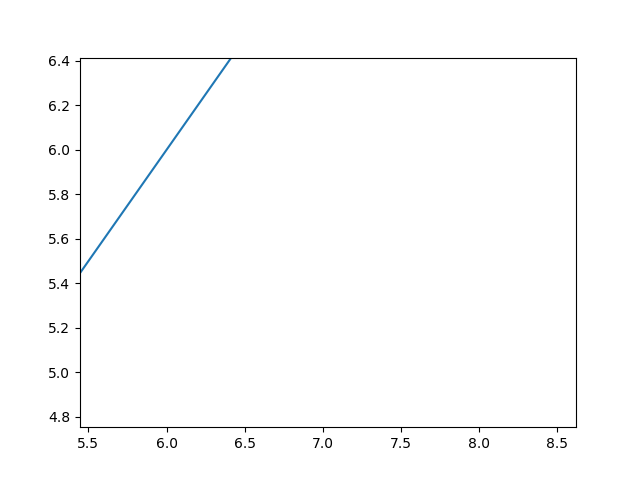

In [60]:
plt.plot(range(10))

By contrast, `%matplotlib inline` will just show a basic plot with a default size:

In [61]:
%matplotlib inline

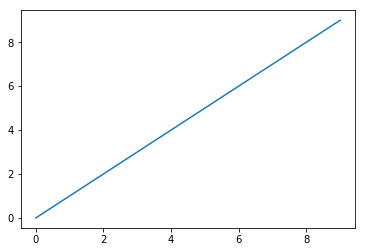

In [62]:
plt.plot(range(10))

For more information on plotting with matplotlib, see their [usage guide](https://matplotlib.org/2.1.1/tutorials/introductory/usage.html).

## Command line programs

The operations listed in the section on magics for working with the file system can of course also be achieved using the corresponding command line programs, so if you know those, no need to memorize the magics. In fact, the magics are often just thin wrappers around the command line programs, which is why they are named the same.

In [63]:
!ls --color -hArtl /etc/nginx

total 56K
-rw-r--r-- 1 root root 3.0K Mar 30  2016 win-utf
-rw-r--r-- 1 root root  664 Mar 30  2016 uwsgi_params
-rw-r--r-- 1 root root  636 Mar 30  2016 scgi_params
-rw-r--r-- 1 root root  180 Mar 30  2016 proxy_params
-rw-r--r-- 1 root root 3.9K Mar 30  2016 mime.types
-rw-r--r-- 1 root root 2.2K Mar 30  2016 koi-win
-rw-r--r-- 1 root root 2.8K Mar 30  2016 koi-utf
-rw-r--r-- 1 root root 1007 Mar 30  2016 fastcgi_params
-rw-r--r-- 1 root root 1.1K Mar 30  2016 fastcgi.conf
drwxr-xr-x 2 root root 4.0K Apr 26  2016 conf.d
-rw-r--r-- 1 root root 1.5K Apr 27  2016 nginx.conf
drwxr-xr-x 2 root root 4.0K Apr 27  2016 sites-enabled
drwxr-xr-x 2 root root 4.0K Aug 15 09:21 sites-available
drwxr-xr-x 2 root root 4.0K Aug 15 09:21 snippets


The only functionality that I miss among the magics is the ability to take a quick look at part of a possibly very large text file. This can be done with the `head` command line program, which prints the beginning of a file:

In [64]:
!head jupyter_magic.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Make the most of Python Jupyter notebooks\n",
    "\n",
    "[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/dlukes/dlukes.github.io/source?filepath=content%2Fnotebooks%2Fjupyter_magic.ipynb)\n",
    "\n",


The `-n` option controls how many lines from the beginning of the file should be printed:

In [65]:
!head -n3 jupyter_magic.ipynb regex.ipynb

==> jupyter_magic.ipynb <==
{
 "cells": [
  {

==> regex.ipynb <==
{
 "cells": [
  {


Similarly, the `tail` program prints endings of files:

In [66]:
!tail -n5 jupyter_magic.ipynb

  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}


Another useful feature of command line execution is that instead of *printing* the result, you can have it *returned* as a list of strings corresponding to lines of output. Either by prepending two exclamation marks instead of one:

In [67]:
!!tail -n5 jupyter_magic.ipynb

['  }', ' },', ' "nbformat": 4,', ' "nbformat_minor": 2', '}']

Or by assigning the expression to a variable:

In [68]:
out = !tail -n5 jupyter_magic.ipynb

In [69]:
out

['  }', ' },', ' "nbformat": 4,', ' "nbformat_minor": 2', '}']

## In summary

These are just my favorite shortcuts, the ones I find most helpful. Obviously, there are many more, see `%magic` or `%quickref`. If you think I've missed a really neat one, let me know!